In [7]:
# Loading main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [36]:
# Loading our dataset
train_data = pd.read_csv('./datasets/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv',sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [37]:
train_data.head(2)

Uniq Id            Crawl Timestamp  \
0  1705736792d82aa2f2d3caf1c07c53f4  2020-09-24 03:21:12 +0000   
1  95a9fe6f4810fcfc7ff244fd06784f11  2020-10-30 14:04:08 +0000   

   Dataset Origin                        Product Id  Product Barcode  \
0             NaN  2e17bf4acecdece67fc00f07ad62c910              NaN   
1             NaN  076e5854a62dd283c253d6bae415af1f              NaN   

  Product Company Type Source Product Brand Source  \
0                  Competitor                  NaN   
1                  Competitor                  NaN   

  Product Brand Normalised Source Product Name Source  Match Rank  ...  \
0                             NaN                 NaN         NaN  ...   
1                             NaN                 NaN         NaN  ...   

   Product Currency  Product Available Inventory  \
0               USD                    111111111   
1               USD                    111111111   

                                   Product Image Url Product Model Number  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...                  NaN   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...                  NaN   

                                        Product Tags Product Contents  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...              NaN   
1  Nice 'n Easy Permanent Color, 111 Natural Medi...              NaN   

   Product Rating  Product Reviews Count  Bsr  \
0             NaN                    NaN  NaN   
1             NaN                    NaN  NaN   

                        Joining Key  
0  81350af1be98d3753cf964709f0c766a  
1  0353e63907dc0de0c734db4690300057  

[2 rows x 32 columns]

In [14]:
train_data["Product Tags"]

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [16]:
train_data.shape

(5000, 32)

In [18]:
# to check the missing values in our dataset
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [38]:
train_data = train_data[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]
train_data.head(5)

Uniq Id                        Product Id  \
0  1705736792d82aa2f2d3caf1c07c53f4  2e17bf4acecdece67fc00f07ad62c910   
1  95a9fe6f4810fcfc7ff244fd06784f11  076e5854a62dd283c253d6bae415af1f   
2  8d4d0330178d3ed181b15a4102b287f2  8a4fe5d9c7a6ed26cc44d785a454b124   
3  fddc4df45b35efd886794b261f730c51  03b5fb878a33eadff8b033419eab9669   
4  0990cf89a59ca6a0460349a3e4f51d42  ce3d761e57d6ccad80619297b5b1bcbc   

   Product Rating  Product Reviews Count  \
0             NaN                    NaN   
1             NaN                    NaN   
2             4.5                29221.0   
3             NaN                    NaN   
4             NaN                  131.0   

                                    Product Category    Product Brand  \
0  Premium Beauty > Premium Makeup > Premium Nail...              OPI   
1  Beauty > Hair Care > Hair Color > Auburn Hair ...      Nice'n Easy   
2  Beauty > Hair Care > Hair Color > Permanent Ha...          Clairol   
3                              Beauty > Makeup > Lip  Kokie Cosmetics   
4  Seasonal > Stock Up Essentials > Personal Care...         Gillette   

                                        Product Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                   Product Image Url  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                 Product Description  \
0                                                NaN   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   
3  Calling all matte lip lovers! Indulge in our r...   
4  In 1971, Gillette introduced the Trac II razor...   

                                        Product Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

In [23]:
train_data["Product Tags"]

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [39]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [40]:
train_data['Product Rating'].fillna(0,inplace=True)

C:\Users\TECHNOSELLERS\AppData\Local\Temp\ipykernel_8372\82815808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0,inplace=True)


In [41]:
train_data['Product Reviews Count'].fillna(0,inplace=True)

C:\Users\TECHNOSELLERS\AppData\Local\Temp\ipykernel_8372\2276109712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Reviews Count'].fillna(0,inplace=True)


In [42]:
train_data['Product Category'].fillna('',inplace=True)

C:\Users\TECHNOSELLERS\AppData\Local\Temp\ipykernel_8372\3641585948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Category'].fillna('',inplace=True)


In [43]:
train_data['Product Brand'].fillna('',inplace=True)

C:\Users\TECHNOSELLERS\AppData\Local\Temp\ipykernel_8372\250713074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Brand'].fillna('',inplace=True)


In [33]:
train_data['Product Description'].fillna(0,inplace=True)

C:\Users\TECHNOSELLERS\AppData\Local\Temp\ipykernel_8372\2225208237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Description'].fillna(0,inplace=True)


In [44]:
train_data.head(5)

Uniq Id                        Product Id  \
0  1705736792d82aa2f2d3caf1c07c53f4  2e17bf4acecdece67fc00f07ad62c910   
1  95a9fe6f4810fcfc7ff244fd06784f11  076e5854a62dd283c253d6bae415af1f   
2  8d4d0330178d3ed181b15a4102b287f2  8a4fe5d9c7a6ed26cc44d785a454b124   
3  fddc4df45b35efd886794b261f730c51  03b5fb878a33eadff8b033419eab9669   
4  0990cf89a59ca6a0460349a3e4f51d42  ce3d761e57d6ccad80619297b5b1bcbc   

   Product Rating  Product Reviews Count  \
0             0.0                    0.0   
1             0.0                    0.0   
2             4.5                29221.0   
3             0.0                    0.0   
4             0.0                  131.0   

                                    Product Category    Product Brand  \
0  Premium Beauty > Premium Makeup > Premium Nail...              OPI   
1  Beauty > Hair Care > Hair Color > Auburn Hair ...      Nice'n Easy   
2  Beauty > Hair Care > Hair Color > Permanent Ha...          Clairol   
3                              Beauty > Makeup > Lip  Kokie Cosmetics   
4  Seasonal > Stock Up Essentials > Personal Care...         Gillette   

                                        Product Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Professional Matte Lipstick, Hot Berry, ...   
4  Gillette TRAC II Plus Razor Blade Refills, Fit...   

                                   Product Image Url  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   
4  https://i5.walmartimages.com/asr/1a2ebb06-cd01...   

                                 Product Description  \
0                                                NaN   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   
3  Calling all matte lip lovers! Indulge in our r...   
4  In 1971, Gillette introduced the Trac II razor...   

                                        Product Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...  
4  Gillette TRAC II Plus Razor Blade Refills, Fit...

In [47]:
train_data.duplicated().sum()

np.int64(0)

In [51]:
train_data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [52]:
column_name_mapping = {
    'Uniq Id':'ID',
    'Product Id':'ProdID',
    'Product Rating':'Rating',
    'Product Reviews Count':'ReviewCount',
    'Product Category':'Category',
    'Product Brand':'Brand',
    'Product Name':'Name',
    'Product Image Url':'ImageURL',
    'Product Description':'Description',
    'Product Tags':'Tags'
}
train_data.rename(columns=column_name_mapping,inplace=True)

In [53]:
train_data.head(4)

ID                            ProdID  Rating  \
0  1705736792d82aa2f2d3caf1c07c53f4  2e17bf4acecdece67fc00f07ad62c910     0.0   
1  95a9fe6f4810fcfc7ff244fd06784f11  076e5854a62dd283c253d6bae415af1f     0.0   
2  8d4d0330178d3ed181b15a4102b287f2  8a4fe5d9c7a6ed26cc44d785a454b124     4.5   
3  fddc4df45b35efd886794b261f730c51  03b5fb878a33eadff8b033419eab9669     0.0   

   ReviewCount                                           Category  \
0          0.0  Premium Beauty > Premium Makeup > Premium Nail...   
1          0.0  Beauty > Hair Care > Hair Color > Auburn Hair ...   
2      29221.0  Beauty > Hair Care > Hair Color > Permanent Ha...   
3          0.0                              Beauty > Makeup > Lip   

             Brand                                               Name  \
0              OPI  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1      Nice'n Easy  Nice n Easy Permanent Color, 111 Natural Mediu...   
2          Clairol  Clairol Nice N Easy Permanent Color 7/106A Nat...   
3  Kokie Cosmetics  Kokie Professional Matte Lipstick, Hot Berry, ...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   
3  https://i5.walmartimages.com/asr/25b4b467-bc61...   

                                         Description  \
0                                                NaN   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   
3  Calling all matte lip lovers! Indulge in our r...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...  
3  Kokie Professional Matte Lipstick, Hot Berry, ...

In [55]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [56]:
train_data.head(3)

ID  ProdID  Rating  ReviewCount  \
0  1.705737e+09     2.0     0.0          0.0   
1  9.500000e+01    76.0     0.0          0.0   
2  8.000000e+00     8.0     4.5      29221.0   

                                            Category        Brand  \
0  Premium Beauty > Premium Makeup > Premium Nail...          OPI   
1  Beauty > Hair Care > Hair Color > Auburn Hair ...  Nice'n Easy   
2  Beauty > Hair Care > Hair Color > Permanent Ha...      Clairol   

                                                Name  \
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...   
1  Nice n Easy Permanent Color, 111 Natural Mediu...   
2  Clairol Nice N Easy Permanent Color 7/106A Nat...   

                                            ImageURL  \
0  https://i5.walmartimages.com/asr/0e1f4c51-c1a4...   
1  https://i5.walmartimages.com/asr/9c8e42e4-13a5...   
2  https://i5.walmartimages.com/asr/e3a601c2-6a2b...   

                                         Description  \
0                                                NaN   
1  Pack of 3 Pack of 3 for the UPC: 381519000201 ...   
2  This Clairol Nice N Easy Permanent Color gives...   

                                                Tags  
0  OPI Infinite Shine, Nail Lacquer Nail Polish, ...  
1  Nice 'n Easy Permanent Color, 111 Natural Medi...  
2  Clairol Nice 'N Easy Permanent Color 7/106A Na...

In [57]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Total No of Unique Users: {num_users}")
print(f"Total No of Unique items: {num_items}")
print(f"Total No of Unique ratings: {num_ratings}")

Total No of Unique Users: 1721
Total No of Unique items: 1697
Total No of Unique ratings: 36


Text(0.5, 1.0, 'Most Popular Items')

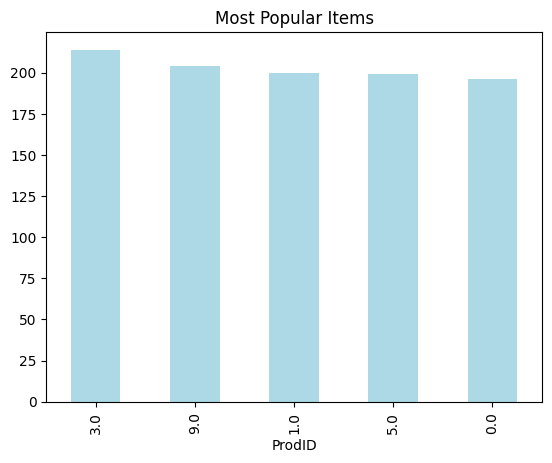

In [61]:
# barchart 
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='lightblue')
plt.title("Most Popular Items")

<Axes: xlabel='Rating'>

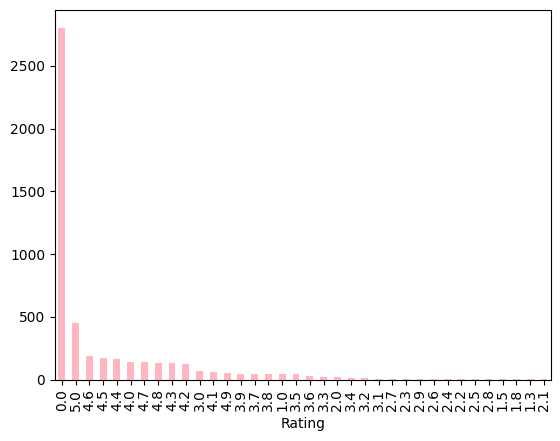

In [62]:
train_data['Rating'].value_counts().plot(kind='bar',color='lightpink')

In [64]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject